# ----------------------------------------------------------------------
# Supervised Learning - Logistic Regression
# ----------------------------------------------------------------------

## Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Exploring the Data - Reading the dataset file using pandas. Take care about the delimiter.


In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, recall_score, precision_score,f1_score,auc, confusion_matrix

In [449]:
# Read dataset using pandas
df = pd.read_csv("students-data.csv", delimiter=";")

In [450]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [451]:
df.shape

(395, 33)

In [452]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

# Q1. Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [453]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Insights

There are no missing values in the dataset


# Q2. Transform Data


*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [454]:
df.select_dtypes(include=['object'],exclude=['int64']).head(5)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


# Q3. Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

#### Answer:

In [455]:
df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Insights

 The following features have variance less than 1
 
 1. traveltime
 2. studytime
 3. failures
 4. famrel
 5. Dalc
 
 The feaure freetime is having variance almost approximately close to 1.So not considering that feature for drop

In [456]:
data = df.drop(['traveltime','studytime','failures','famrel','Dalc'],axis=1)

In [457]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,freetime,goout,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,3,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,3,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,3,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,2,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,3,2,2,5,4,6,10,10


# Q4. Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [458]:
from sklearn.preprocessing import LabelEncoder

In [459]:
categorical_feature_mask = data.dtypes == object

categorical_cols = data.columns[categorical_feature_mask].tolist()

le = LabelEncoder()

data[categorical_cols] = data[categorical_cols].apply(lambda col : le.fit_transform(col))

In [460]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,freetime,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,0,0,3,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,0,3,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,0,3,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,2,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,0,0,3,2,2,5,4,6,10,10


# Q5. Convert the continuous values of grades into classes 

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [461]:
filter1 = data['G1'] >= 10

data['G1'].where(cond=filter1,other=0, inplace=True)

In [462]:
filter1 = data['G2'] >= 10

data['G2'].where(cond=filter1, other=0, inplace=True)

In [463]:
filter1 = data['G3'] >= 10

data['G3'].where(cond=filter1, other=0, inplace=True)

In [464]:
filter1 = data['G1'] == 0

data['G1'].where(filter1, other=1, inplace=True)

filter1 = data['G2'] == 0
data['G2'].where(filter1, other=1, inplace=True)

filter1 = data['G3'] == 0
data['G3'].where(filter1, other=1, inplace=True)

In [465]:
data[['G1','G2','G3']].head(10)

,G1,G2,G3
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1
5,1,1,1
6,1,1,1
7,0,0,0
8,1,1,1
9,1,1,1


# Q6. Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.

#### Answer:

In [466]:
X = data.drop('G3',axis=1)

y = data['G3']

In [467]:
X.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,freetime,goout,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,3,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,3,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,3,2,2,5,4,0,1


In [468]:
y.head(5)

0    0
1    0
2    1
3    1
4    1
Name: G3, dtype: int64

## Visualization

# Q7. Plot G2 and G3 and give your understanding on relation between both variables.

### Hint: Use pd.crosstab(sd.G2,sd.G3).plot(kind='bar')

#### Answer:

In [469]:
pd.crosstab(data['G2'],data['G3'],margins=True)

G3,0,1,All
G2,,,
0,122,24,146
1,8,241,249
All,130,265,395


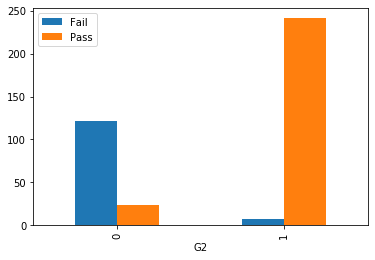

In [470]:
pd.crosstab(data['G2'], data['G3']).plot(kind='bar')
l = plt.legend()
l.get_texts()[0].set_text('Fail')
l.get_texts()[1].set_text('Pass')
plt.show()

# Insights

1. Students who failed in G2 are passed in G3 and the number is equal to 24

2. Students who failed in G3 are passed in G2 and this number is equal to 8.

3. From the above two statements, students who are underperforming in G2 are performing well in G3 and this number is relatively large when compared to students are underperforming in G3 but performing well in G2.

# Q8. Plot the number of students in each school and number of students with different ages in separate plots.

### Hint: use seaborn sns.countplot()

#### Answer:

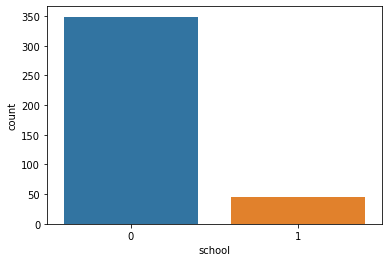

In [471]:
sns.countplot(data['school'])
plt.show()

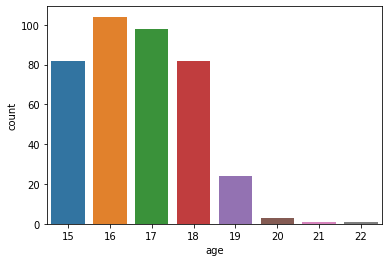

In [472]:
sns.countplot(data['age'])
plt.show()

# Insights

1. There are more number of students in School '0' compared to School '1'

2. For most of the students, the ages are more concentrated in the interval [15,16,17,18]. Only few students have age of 19

# Q9. Training and testing data split

 *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=8)

In [474]:
X_train.shape

(300, 27)

In [475]:
y_train.shape

(300,)

In [476]:
X_test.shape

(95, 27)

In [477]:
y_test.shape

(95,)

# Q10. - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*

#### Answer:

In [478]:
model = LogisticRegression()

In [479]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [480]:
y_pred_train = model.predict(X_train)

model.score(X_train, y_train)

0.9166666666666666

In [481]:
y_pred_test = model.predict(X_test)

model.score(X_test, y_test)

0.9368421052631579

In [482]:
print(confusion_matrix(y_pred_test, y_test))

[[33  4]
 [ 2 56]]


In [483]:
precision_score(y_test, y_pred_test, average='weighted')

0.9383921126207878

In [484]:
recall_score(y_test, y_pred_test, average='weighted')

0.9368421052631579

In [485]:
accuracy_score(y_test, y_pred_test)

0.9368421052631579

In [486]:
f1_score(y_test, y_pred_test)

0.9491525423728815

# Insights From the metrics

1. The Logistic Regression model's accuracy on the training dataset is 92% where as on the test dataset is 94% (round to nearest integer)

2. Model's recall is 93% when compared to precision 94%. 

3. Model is performing well on the test dataset compared to train dataset.

# ----------------------------------------------------------------------
# Supervised Leaning - Naive Bayes with Iris Data
# ----------------------------------------------------------------------

In [487]:
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore

### Import Iris.csv

In [488]:
# Load using input file
iris=pd.read_csv("Iris.csv")
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Treat NaN's/ Null values found

In [489]:
iris.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [490]:
iris=iris.fillna(0)

In [491]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Slice  Iris data set for Independent variables and dependent variables

#### Please note 'Species' is your dependent variable, name it y and independent set data as X

In [492]:
X = iris.drop('Species',axis=1)
y = iris['Species']

In [493]:
X.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [494]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iris-virginica
135    Iris-virginica
136    Iri

# Q1.  Find the distribution of target variable (Species) and, Plot the distribution of target variable using histogram

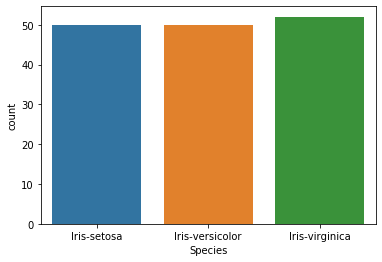

In [495]:
sns.countplot(iris['Species'])
plt.show()

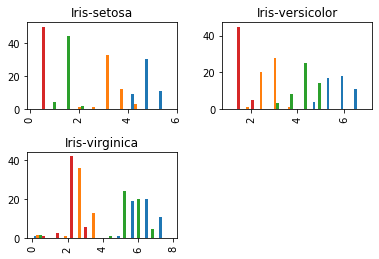

In [496]:
df = iris.drop('Id', axis=1)

df.hist(by='Species')
plt.show()

In [497]:
# Drop Id variable from data

In [498]:
X = X.drop('Id',axis=1)

X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Q2. Find Correlation among all variables and give your insights 

In [499]:
corr_matrix = X.corr()

corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.145802,0.816560,0.668652
SepalWidthCm,0.145802,1.000000,-0.167316,-0.246073
PetalLengthCm,0.816560,-0.167316,1.000000,0.936151
PetalWidthCm,0.668652,-0.246073,0.936151,1.000000


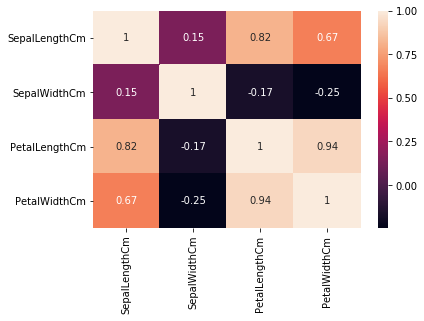

In [500]:
sns.heatmap(corr_matrix, annot = True)
plt.show()

# Insights From Correlation Matrix

1. SepalLength has high strong postive correlation with PetalLength

2. SepalLength has strong postive correlation with PetalWidth

3. SepalWidth has low negative correlation with PetalLength and PetalWidth.

### Split data in Training and test set in 80:20.

In [501]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 8)

# Q3. Feature Scaling on X_Train and X_Test

In [502]:
# Use StandardScaler or similar methods

In [503]:
X_train = zscore(X_train)

X_test = zscore(X_test)

# Q4. Train and Fit NaiveBayes Model

In [504]:
model = GaussianNB()

In [505]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [506]:
y_pred_train = model.predict(X_train)
model.score(X_train, y_train)

0.9669421487603306

In [507]:
y_pred_test = model.predict(X_test)

model.score(X_test, y_test)

0.9354838709677419

# Q5.  Print Accuracy and Confusion Matrix and Conclude your findings

In [508]:
print(confusion_matrix(y_test, y_pred_test))

[[11  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [509]:
accuracy_score(y_test, y_pred_test)

0.9354838709677419

In [510]:
precision_score(y_test, y_pred_test, average='weighted')

0.9354838709677419

In [511]:
recall_score(y_test, y_pred_test, average='weighted')

0.9354838709677419

# Conclusion From the Metrics

1. The model accuracy on the train dataset is 96% and on the test dataset is 93% which is quiet good.

2. In addition to the accuracy score, the model's precision and recall score is 93%

3. The F1-score is 93% i.e.the number of False Postives and False Negatives are quiet low. So the model is performing well on the test dataset.